#Importing the Dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

#Data Collection and Data Preprossessing

In [ ]:
#loading the dataset to a pandas DataFrame
weather_data = pd.read_csv('/content/Data_augmented_50.csv')

In [ ]:
print('Missing Values in Each Column:\n', weather_data.isnull().sum())

Missing Values in Each Column:
 datetime     0
temp         0
humidity     0
rainfall     0
windspeed    0
FLOOD        0
dtype: int64


In [ ]:
# Checking duplicate values
weather_data.duplicated().sum()

391

In [ ]:
weather_data.sample(n=7)

,datetime,temp,humidity,rainfall,windspeed,FLOOD
229,2022-08-18,22.2,83.6,41.67,6.5,1
327,2022-11-24,12.0,48.6,0.00,5.0,0
340,2022-12-07,10.3,38.1,0.00,5.4,0
384,2024-01-20,6.5,56.3,0.00,8.3,0
535,2024-06-19,27.3,38.0,8.33,8.7,0
927,2022-08-21,21.8,79.9,20.83,6.1,1
703,2024-12-04,11.6,48.6,0.00,3.6,0


In [ ]:
# Summary of Data
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,1103.0,18.510771,5.134260,3.0,16.10,20.90,21.80,28.90
humidity,1103.0,69.937883,21.807094,18.6,51.95,80.40,86.90,99.10
rainfall,1103.0,30.977961,28.182949,0.0,0.00,33.33,54.17,91.67
windspeed,1103.0,8.708802,4.534746,0.0,6.10,7.60,9.40,37.10
FLOOD,1103.0,0.376247,0.484663,0.0,0.00,0.00,1.00,1.00


In [ ]:
weather_data.shape

(1103, 6)

In [ ]:
weather_data.columns

Index(['datetime', 'temp', 'humidity', 'rainfall', 'windspeed', 'FLOOD'], dtype='object')

In [ ]:
# Information about dataset
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   1103 non-null   object 
 1   temp       1103 non-null   float64
 2   humidity   1103 non-null   float64
 3   rainfall   1103 non-null   float64
 4   windspeed  1103 non-null   float64
 5   FLOOD      1103 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 51.8+ KB


In [ ]:
#separating data and labels
X = weather_data.drop(columns =["datetime","FLOOD" ])
Y = weather_data["FLOOD"]

In [ ]:
print(X)
print(Y)

      temp  humidity  rainfall  windspeed
0      7.2      70.6      0.00        4.0
1      8.2      66.9      0.00        5.1
2      8.6      67.6      0.00        3.6
3      8.8      71.8     29.17        5.4
4      8.4      89.6     45.83        4.3
...    ...       ...       ...        ...
1098  21.1      82.6     41.67        6.1
1099  21.8      79.9     20.83        6.1
1100  20.7      78.6      4.17        7.6
1101  20.7      78.6      4.17        7.6
1102  21.3      86.3     75.00        7.6

[1103 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1098    1
1099    1
1100    1
1101    1
1102    1
Name: FLOOD, Length: 1103, dtype: int64


#Visual Representation of DataSet

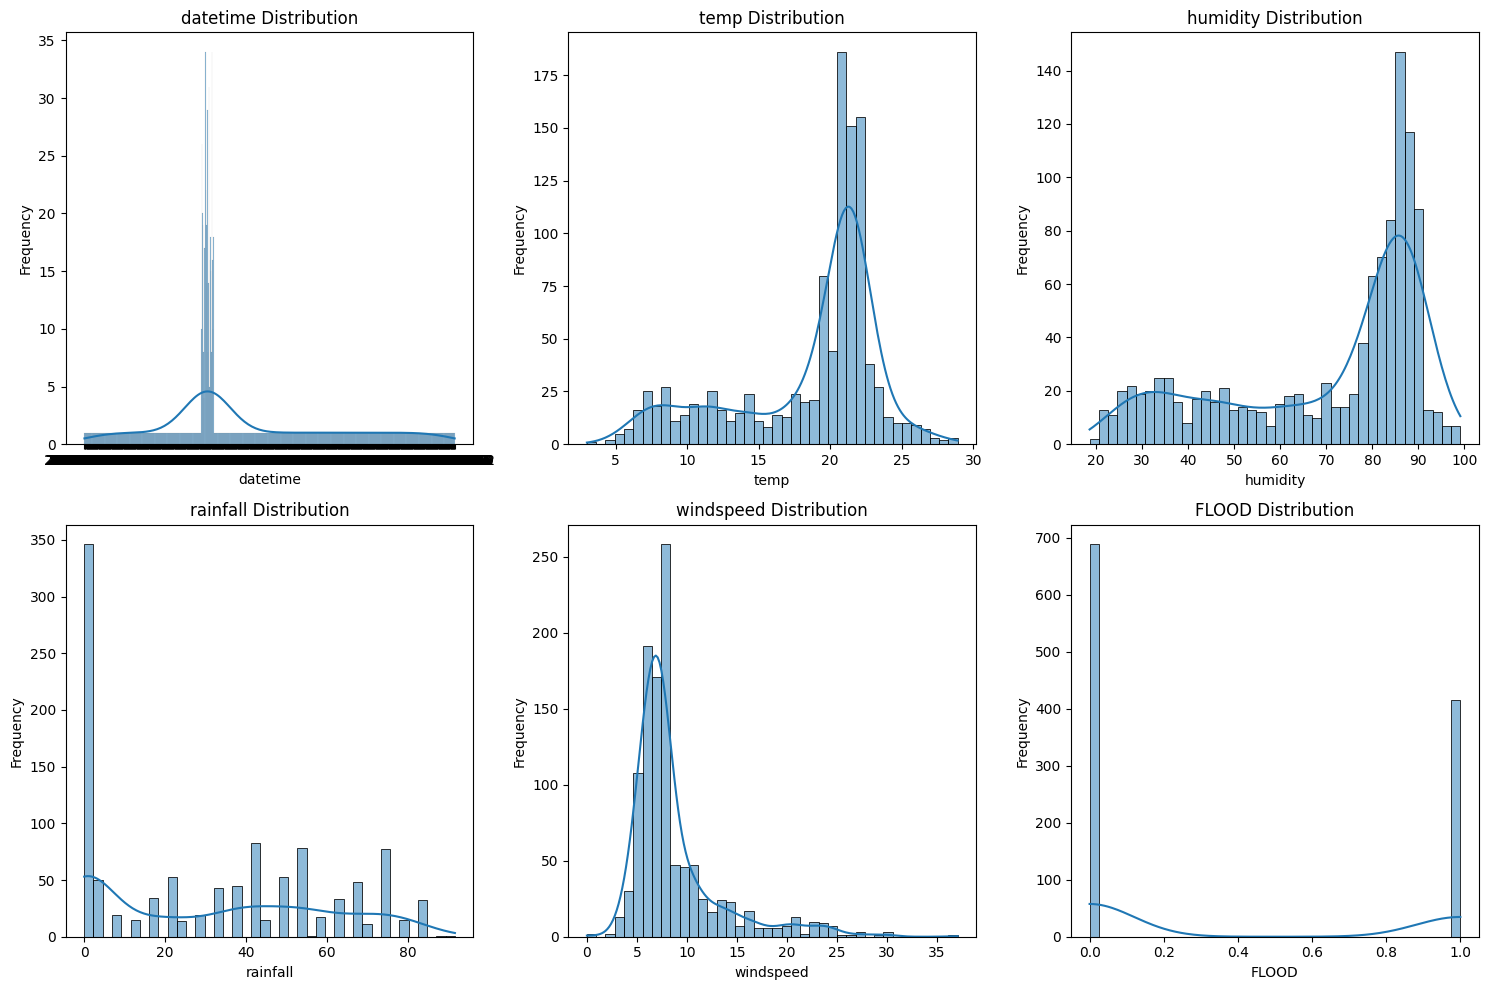

In [ ]:
# Define number of rows and columns for the grid
nrows = (len(weather_data.columns) + 2) // 3  # 3 graphs per row
ncols = min(len(weather_data.columns), 3)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten axes if necessary
if nrows == 1:
    axes = [axes]

# Plot distribution for each feature
for i, col in enumerate(weather_data.columns):
    row_index = i // ncols
    col_index = i % ncols
    ax = axes[row_index][col_index]
    sns.histplot(weather_data[col],bins=40, kde=True, ax=ax)
    ax.set_title(col + ' Distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)

# Remove empty subplots if ncols * nrows > number of features
if nrows * ncols > len(weather_data.columns):
    for i in range(len(weather_data.columns), nrows * ncols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show();

#Features VS Target

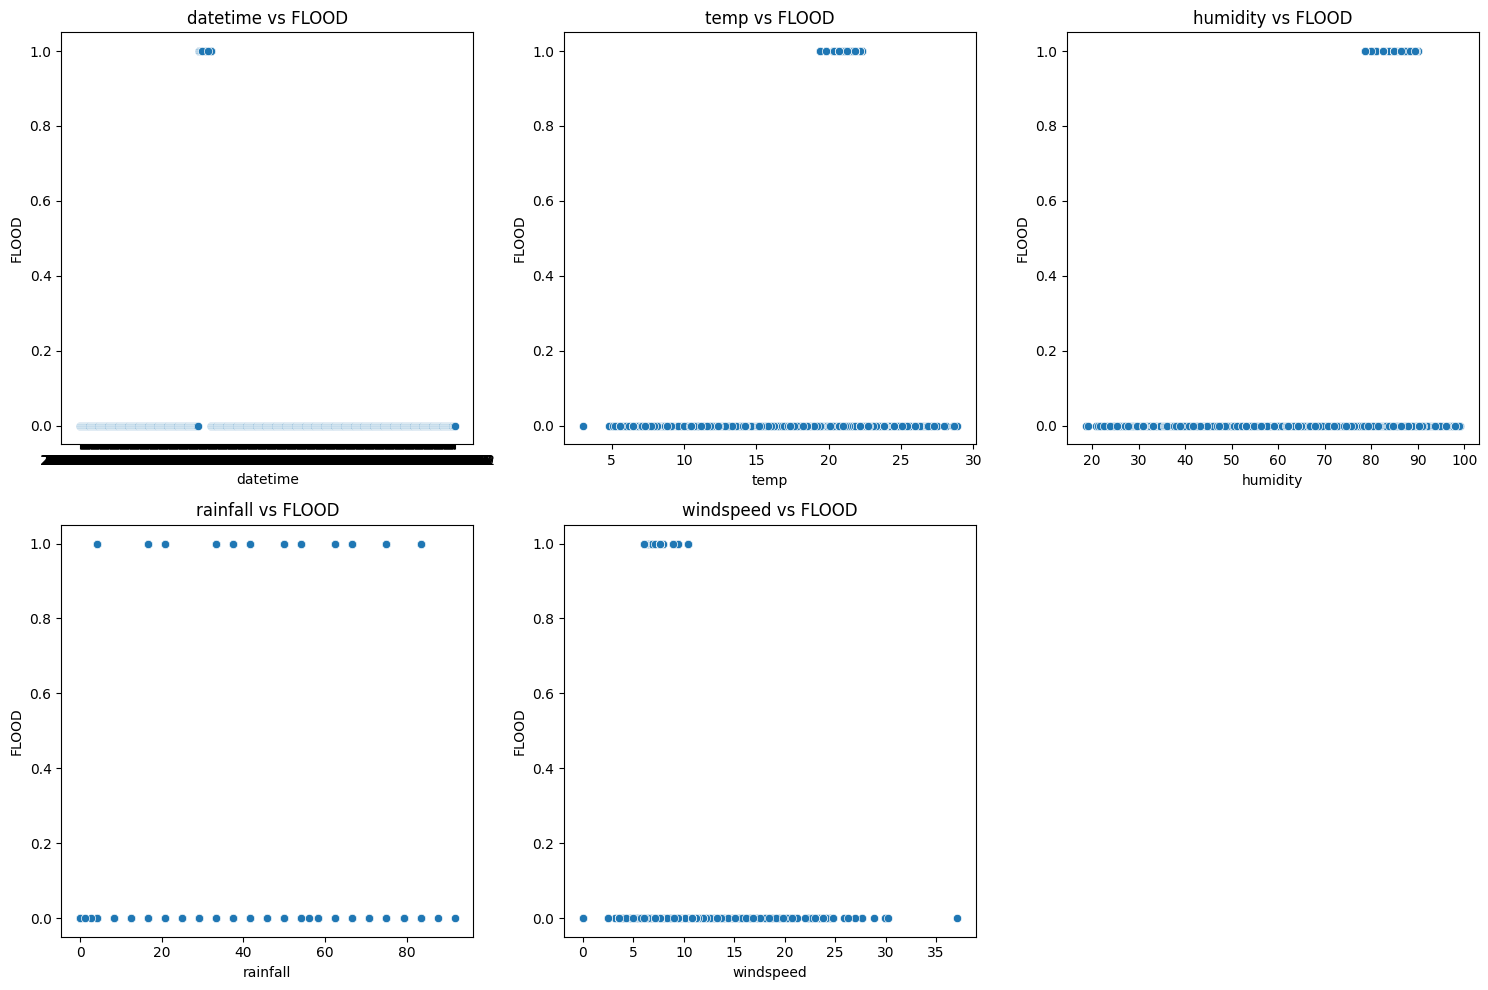

In [ ]:
# Define target column
target_column = 'FLOOD'

# Define number of rows and columns for the grid
nrows = (len(weather_data.columns) - 1 + 2) // 3  # 3 graphs per row
ncols = min(len(weather_data.columns) - 1, 3)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten axes if necessary
if nrows == 1:
    axes = [axes]

# Plot scatter plot for each feature with the target column
for i, col in enumerate(weather_data.columns):
    if col == target_column:
        continue
    row_index = i // ncols
    col_index = i % ncols
    ax = axes[row_index][col_index]
    sns.scatterplot(x = weather_data[col], y = weather_data[target_column],ax=ax)
    ax.set_title(f'{col} vs {target_column}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_column)

# Remove empty subplots if ncols * nrows > number of features
if nrows * ncols > len(weather_data.columns) - 1:
    for i in range(len(weather_data.columns) - 1, nrows * ncols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show();

#HeatMap Correlation

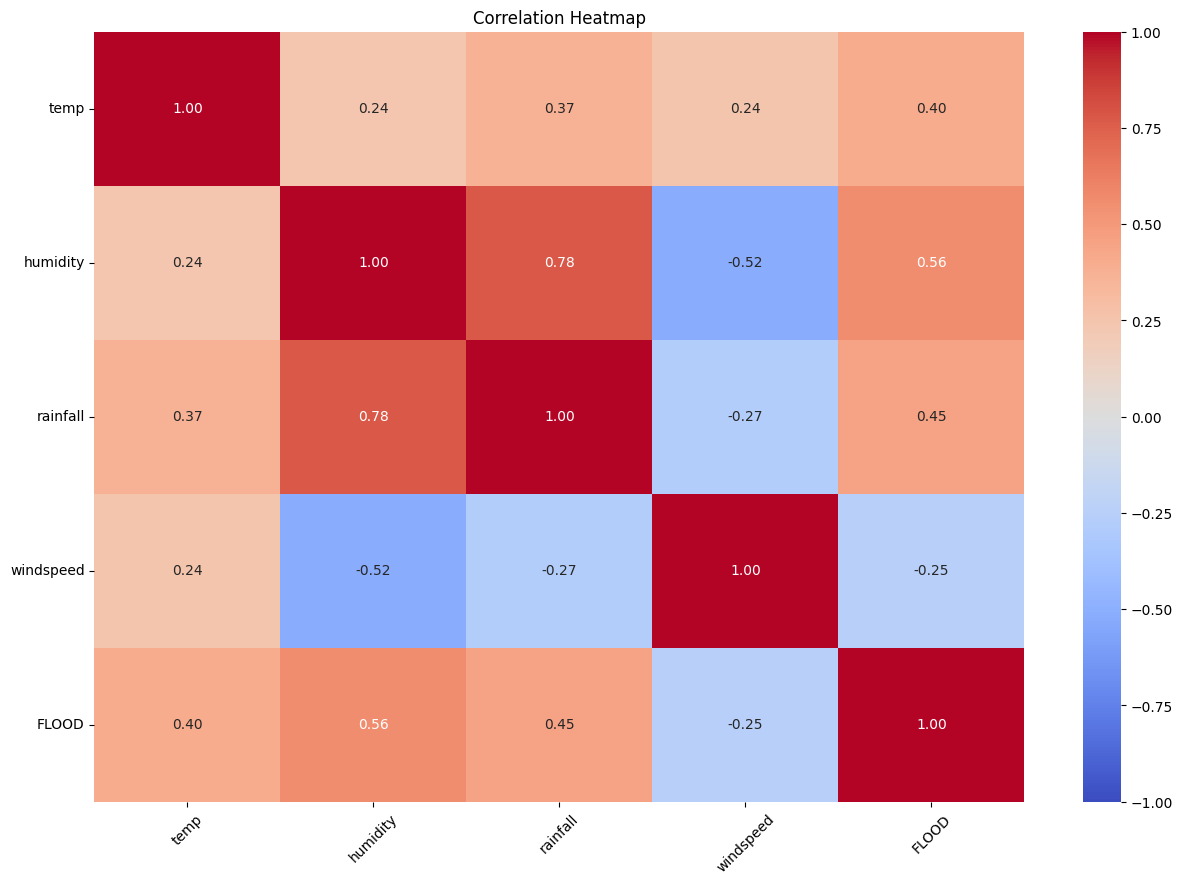

In [ ]:
weather_data = weather_data.drop(columns=['datetime'])
plt.figure(figsize=(15, 10))
sns.heatmap(weather_data.corr(), annot=True,fmt='.2f', cmap='coolwarm', vmax=1, vmin=-1)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

#Training and Testing Data

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , stratify = Y , random_state = 1)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(1103, 4) (882, 4) (221, 4)


In [ ]:
print(X_train)
print(Y_train)

      temp  humidity  rainfall  windspeed
1070  21.1      82.6     41.67        6.1
732   20.7      78.6      4.17        7.6
254   20.2      82.8     45.83        6.8
1005  21.7      86.9     62.50        7.2
470   18.8      51.1     16.67       11.2
...    ...       ...       ...        ...
1091  21.7      86.9     62.50        7.2
232   21.8      79.9     20.83        6.1
873   21.8      79.9     20.83        6.1
111   20.8      38.5      0.00       16.2
1042  22.3      85.3     54.17        7.6

[882 rows x 4 columns]
1070    1
732     1
254     0
1005    1
470     0
       ..
1091    1
232     1
873     1
111     0
1042    1
Name: FLOOD, Length: 882, dtype: int64


#Model Training (Logistic Regression)

In [ ]:
model = LogisticRegression()

In [ ]:
# Training the logistic regression model with the training data
model.fit(X_train , Y_train)

LogisticRegression()

#Model Evaluation

In [ ]:
# Accuracy of the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)


In [ ]:
print('Accuracy on the training data' , training_data_accuracy)

Accuracy on the training data 0.8321995464852607


In [ ]:
# Accuracy of the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [ ]:
print('Accuracy on the test data' , test_data_accuracy)

Accuracy on the test data 0.8416289592760181


In [ ]:
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       138
           1       0.73      0.93      0.81        83

    accuracy                           0.84       221
   macro avg       0.84      0.86      0.84       221
weighted avg       0.86      0.84      0.84       221



#Making a Predictive System

In [ ]:
input_data = (21.2,83.9,16.67,10.4)

# changing the input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1 , -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print('There is no chances of flood')
else:
  print('There is high chances of flood')

[1]
There is high chances of flood


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(weather_data.drop(columns=["FLOOD"]))  # Replace 'TargetColumn' with actual column name

In [ ]:

param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, weather_data["FLOOD"])
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


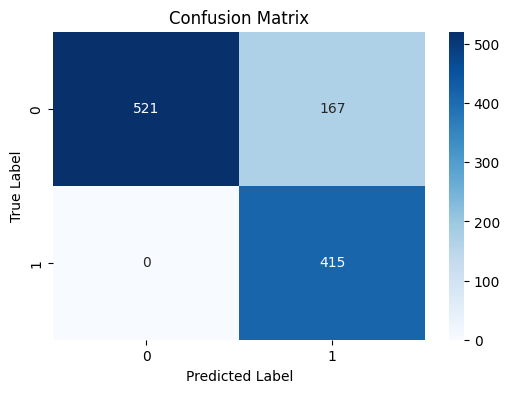

In [ ]:
# Predictions using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_scaled)
conf_matrix = confusion_matrix(weather_data["FLOOD"], y_pred)

# Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



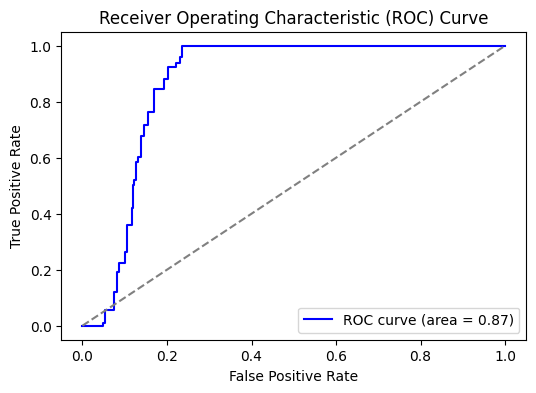

In [ ]:
# ROC Curve
y_prob = best_model.predict_proba(X_scaled)[:, 1]
fpr, tpr, _ = roc_curve(weather_data["FLOOD"], y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Random forest Model

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_acc:.4f}')
print(classification_report(Y_test, rf_pred))

Random Forest Accuracy: 0.9774
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       138
           1       0.94      1.00      0.97        83

    accuracy                           0.98       221
   macro avg       0.97      0.98      0.98       221
weighted avg       0.98      0.98      0.98       221



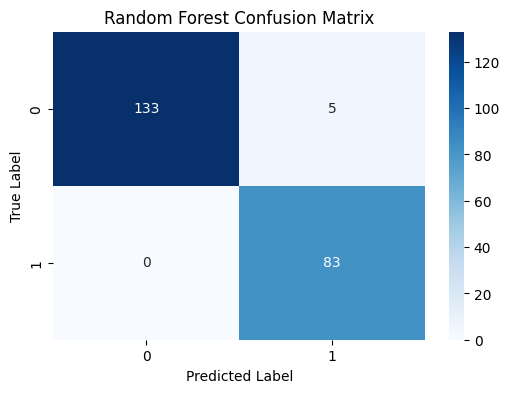

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

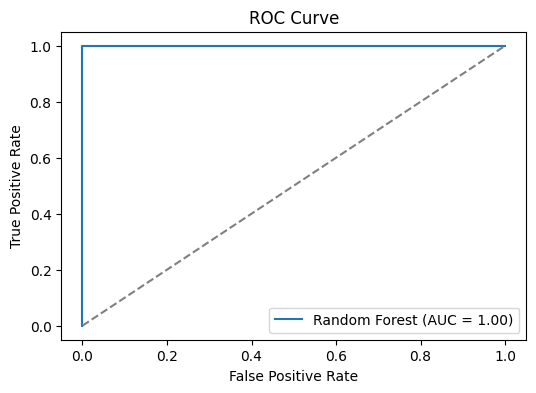

In [ ]:
# ROC Curve
plt.figure(figsize=(6, 4))
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#XGBoost Classifier Model

In [ ]:
# XGBoost Model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(Y_test, xgb_pred)
print(f'XGBoost Accuracy: {xgb_acc:.4f}')
print(classification_report(Y_test, xgb_pred))


XGBoost Accuracy: 0.9638
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       138
           1       0.91      1.00      0.95        83

    accuracy                           0.96       221
   macro avg       0.96      0.97      0.96       221
weighted avg       0.97      0.96      0.96       221



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


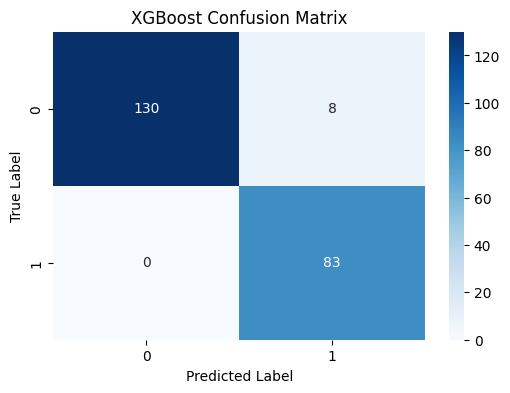

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

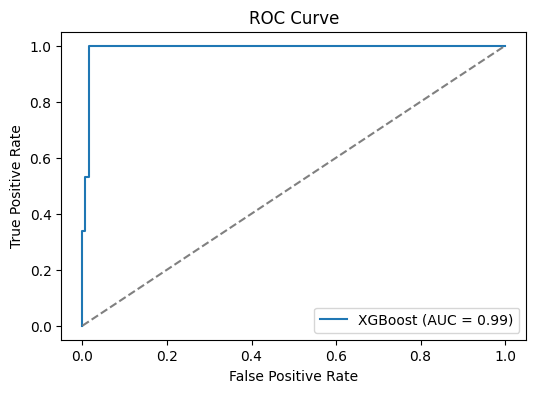

In [ ]:

# ROC Curve
plt.figure(figsize=(6, 4))
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc(fpr_xgb, tpr_xgb):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Decision Tree Classifier Model

In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
print(f'Decision Tree Accuracy: {dt_acc:.4f}')
print(classification_report(Y_test, dt_pred))

Decision Tree Accuracy: 0.9774
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       138
           1       0.94      1.00      0.97        83

    accuracy                           0.98       221
   macro avg       0.97      0.98      0.98       221
weighted avg       0.98      0.98      0.98       221



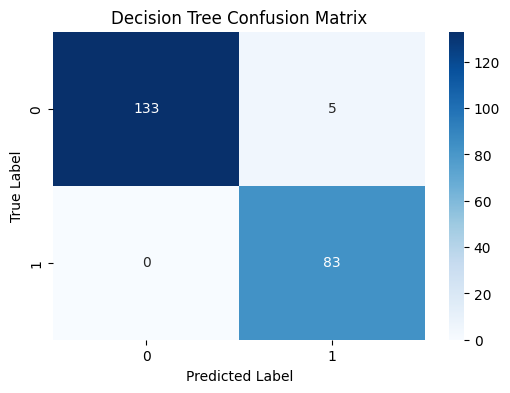

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

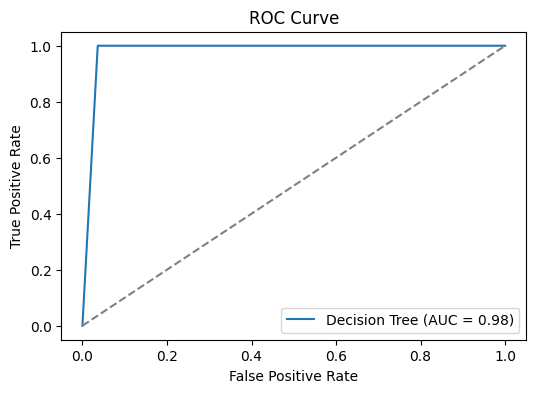

In [ ]:
# ROC Curve
plt.figure(figsize=(6, 4))
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# K-Nearest Neighbors Model

In [ ]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)
print(f'KNN Accuracy: {knn_acc:.4f}')
print(classification_report(Y_test, knn_pred))

KNN Accuracy: 0.9095
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       138
           1       0.81      1.00      0.89        83

    accuracy                           0.91       221
   macro avg       0.90      0.93      0.91       221
weighted avg       0.93      0.91      0.91       221



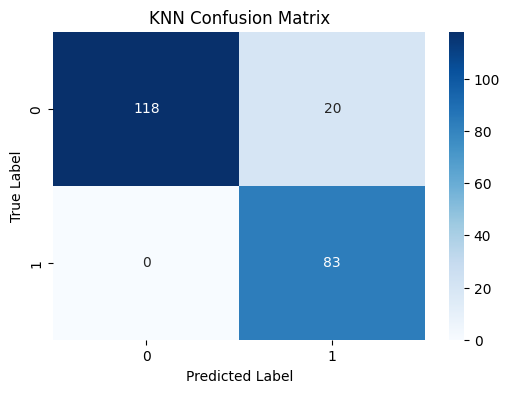

In [ ]:

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

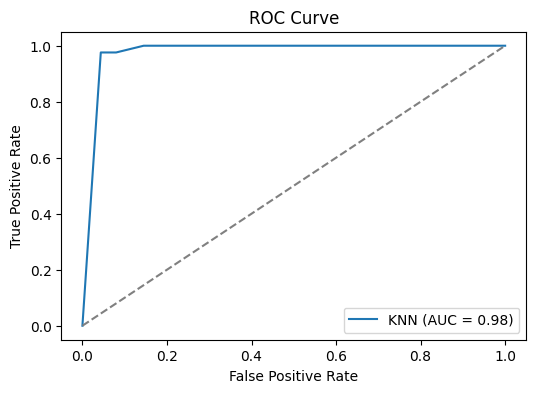

In [ ]:
# ROC Curve
plt.figure(figsize=(6, 4))
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(Y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc(fpr_knn, tpr_knn):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Naive Bayes Model

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
bayes_pred = nb_model.predict(X_test)
bayes_acc = accuracy_score(Y_test, bayes_pred)
print(f'Naive Bayes Accuracy: {bayes_acc:.4f}')
print(classification_report(Y_test, bayes_pred))

Naive Bayes Accuracy: 0.8824
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       138
           1       0.76      1.00      0.86        83

    accuracy                           0.88       221
   macro avg       0.88      0.91      0.88       221
weighted avg       0.91      0.88      0.88       221



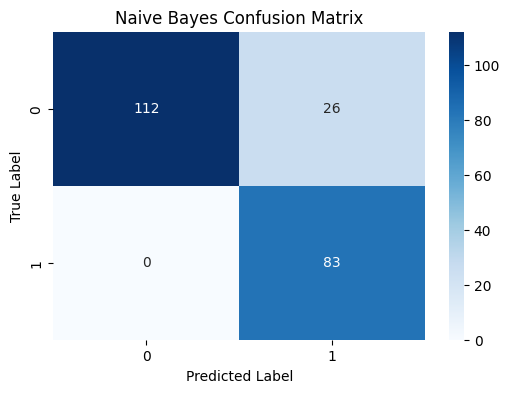

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, bayes_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


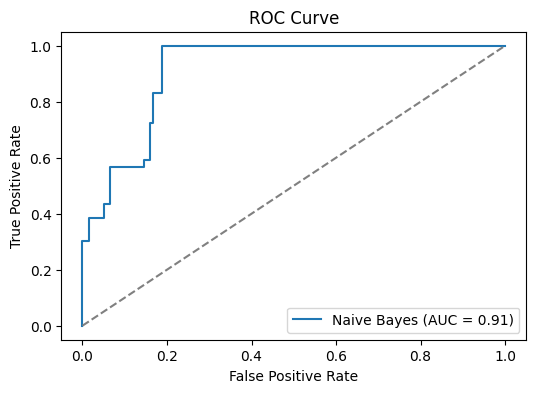

In [ ]:
# ROC Curve
plt.figure(figsize=(6, 4))
y_prob_bayes = nb_model.predict_proba(X_test)[:, 1]
fpr_bayes, tpr_bayes, _ = roc_curve(Y_test, y_prob_bayes)
plt.plot(fpr_bayes, tpr_bayes, label=f'Naive Bayes (AUC = {auc(fpr_bayes, tpr_bayes):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Support Vector Machine Model

In [ ]:
# Support Vector Machine Model
from sklearn.svm import SVC
svm_model = SVC(probability=True, kernel='rbf', random_state=1)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)
print(f'SVM Accuracy: {svm_acc:.4f}')
print(classification_report(Y_test, svm_pred))

SVM Accuracy: 0.7783
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       138
           1       0.65      0.90      0.75        83

    accuracy                           0.78       221
   macro avg       0.79      0.80      0.78       221
weighted avg       0.82      0.78      0.78       221



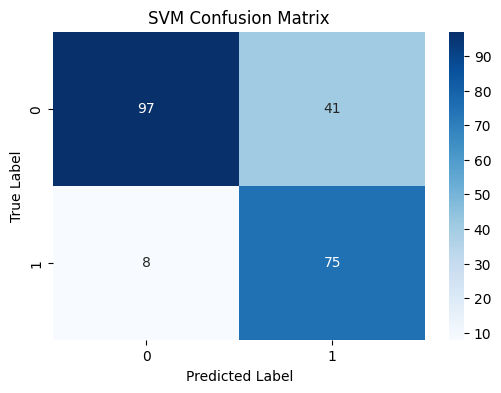

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

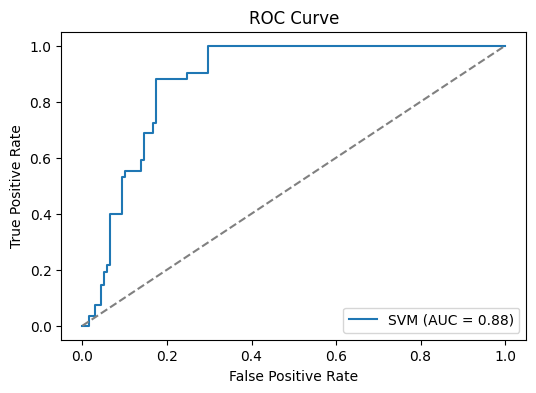

In [ ]:
# ROC Curve
plt.figure(figsize=(6, 4))
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Compare the models

In [ ]:
# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=1),
    'SVM': SVC(probability=True, kernel='rbf', random_state=1),
    'Naive Bayes': GaussianNB()
}


KNN Accuracy: 0.9095
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       138
           1       0.81      1.00      0.89        83

    accuracy                           0.91       221
   macro avg       0.90      0.93      0.91       221
weighted avg       0.93      0.91      0.91       221

Logistic Regression Accuracy: 0.8416
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       138
           1       0.73      0.93      0.81        83

    accuracy                           0.84       221
   macro avg       0.84      0.86      0.84       221
weighted avg       0.86      0.84      0.84       221

Decision Tree Accuracy: 0.9774
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       138
           1       0.94      1.00      0.97        83

    accuracy                           0.98       221
   macro avg       0.97      0.98      

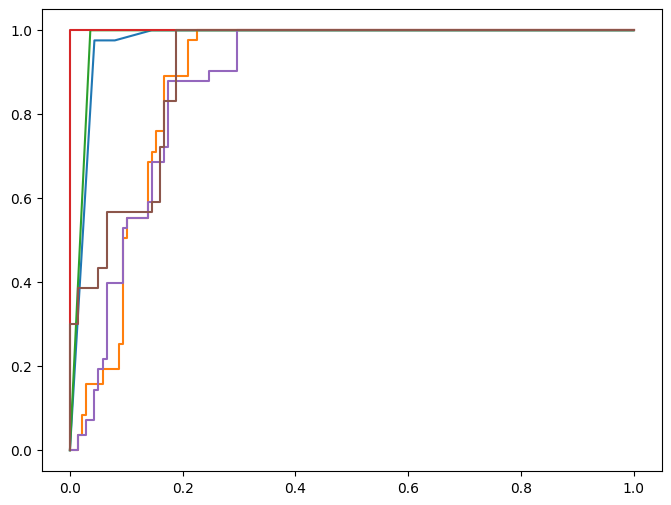

In [ ]:
# Train and evaluate models
results = {}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    results[name] = acc
    print(f'{name} Accuracy: {acc:.4f}')
    print(classification_report(Y_test, y_pred))

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')


<ipython-input-75-86b12ddbd5a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


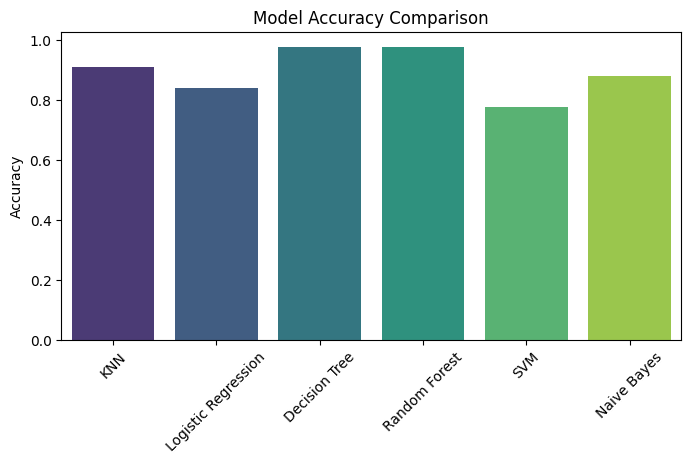

In [ ]:
# Print accuracy comparison
plt.figure(figsize=(8, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()
